In [25]:
#Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [26]:
#Storing the csvpaths
csvpath_confirmed="time_series_19-covid-Confirmed.csv"
csvpath_deaths="time_series_19-covid-Deaths.csv"
csvpath_recovered="time_series_19-covid-Recovered.csv"

In [27]:
#Reading into a pandas DataFrame
Confirmed_df1=pd.read_csv(csvpath_confirmed)
Deaths_df1=pd.read_csv(csvpath_deaths)
Recovered_df1=pd.read_csv(csvpath_recovered)

In [28]:
#Manipulating the Confirmed dataframe
#Dropping the colums which are not required
Confirmed_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)


In [29]:
#Filling NaN with a 0 for calculations
Confirmed_df1=Confirmed_df1.fillna(0)
Confirmed_df1.head()
#len(Confirmed_df1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,43,47,48,50,50,50,53,59,70,75
1,Japan,2,1,2,2,4,4,7,7,11,...,331,360,420,461,502,511,581,639,639,701
2,Singapore,0,1,3,3,4,5,7,7,10,...,110,117,130,138,150,150,160,178,178,200
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,50,50,83,93,99,117,129,149,149,197


In [30]:
#Grouping the Confirmed cases dataframe by Country/Region
Confirmed_group=Confirmed_df1.groupby(["Country/Region"])


#Creating the final Confirmed dataframe to be used further
Confirmed_final=Confirmed_group.sum()
Confirmed_final.head()
#len(Confirmed_final)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,4,4,5,7,7,7
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,10,12,23,33
Algeria,0,0,0,0,0,0,0,0,0,0,...,12,12,17,17,19,20,20,20,24,26
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#Manipulating the Deaths dataframe
#Dropping the colums which are not required
Deaths_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)


In [32]:
#Filling NaN with a 0 for calculations
Deaths_df1=Deaths_df1.fillna(0)
Deaths_df1.head()
#len(Confirmed_df1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Thailand,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,Japan,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,10,10,15,16,19
2,Singapore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Nepal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Malaysia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Grouping the Death cases dataframe by Country/Region
Deaths_group=Deaths_df1.groupby(["Country/Region"])


#Creating the final Death dataframe to be used further
Deaths_final=Deaths_group.sum()
Deaths_final.head()
#len(Deaths_final)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Manipulating the Recovered dataframe
#Dropping the colums which are not required
Recovered_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)

In [35]:
#Filling NaN with a 0 for calculations
Recovered_df1=Recovered_df1.fillna(0)
Recovered_df1.head()
#len(Recovered_df1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Thailand,0,0,0,0,2,2,5,5,5,...,31,31,31,31,31,31,33,34,34,35
1,Japan,0,0,0,0,1,1,1,1,1,...,43,43,46,76,76,76,101,118,118,118
2,Singapore,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,78,96,96,97
3,Nepal,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,0,0,0,0,0,0,...,22,22,22,23,24,24,24,26,26,26


In [36]:
#Grouping the Recovered cases dataframe by Country/Region
Recovered_group=Recovered_df1.groupby(["Country/Region"])


#Creating the final Recovered dataframe to be used further
Recovered_final=Recovered_group.sum()
Recovered_final.head()
#len(Recovered_final)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
china_df=pd.DataFrame({
                    "#Cummulative Confirmed Cases":Confirmed_final.loc["China",:].tolist()
                   })
#US_df = US_df.set_index('Dates')
china_df.tail()

,#Cummulative Confirmed Cases
47,80860
48,80887
49,80921
50,80932
51,80945


In [204]:
china_df_model = china_df
#china_df_model.head()

In [205]:
china_df_model_mean = china_df_model.rolling(window = 7).mean()
china_df_model_mean.head()

,#Cummulative Confirmed Cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


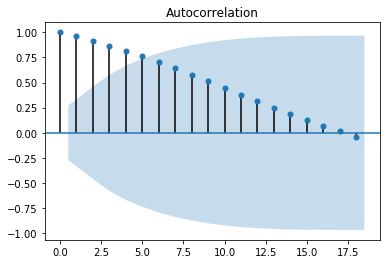

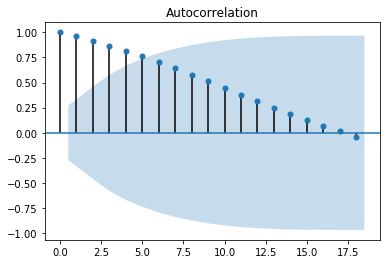

In [206]:
#ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)
#plot_acf is to identify parameter q
#plot_pacf is to identify parameter p
#ARIMA (p,d,q)

plot_acf(china_df_model)

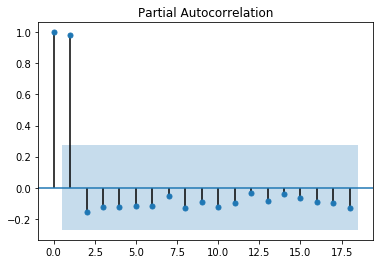

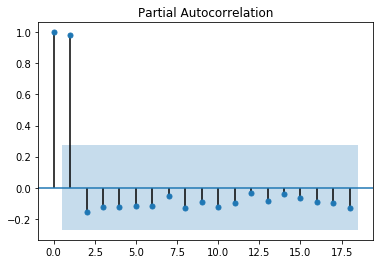

In [207]:
plot_pacf(china_df_model)

In [307]:
train_parameter_china = 38

In [308]:
# p = 0,1  d = 0,1  q = 0,1,2,3,4,5
#china_df_model.size >>> 52
china_df_train = china_df_model[0:train_parameter_china]
china_df_test = china_df_model[train_parameter_china:52]
forecast_step_china = china_df_test.size
forecast_step_china

14

In [309]:
china_model = ARIMA(china_df_train, order=(1,0,4))

In [310]:
china_model_fit = china_model.fit()
china_model_fit.aic

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


730.2184610127575

In [311]:
china_forecast = china_model_fit.forecast(steps = forecast_step_china)[0]
china_forecast

array([79168.54221163, 79347.16349199, 79496.12561085, 79578.82574414,
       79661.35882304, 79743.79312334, 79826.12876325, 79908.36586085,
       79990.50453409, 80072.54490075, 80154.48707851, 80236.33118486,
       80318.0773372 , 80399.72565274])

In [312]:
np.sqrt(mean_squared_error(china_df_test,china_forecast))

701.4092931405349

In [313]:
china_df_test

,#Cummulative Confirmed Cases
38,79356
39,79932
40,80136
41,80261
42,80386
43,80537
44,80690
45,80770
46,80823
47,80860


In [314]:
china_predict_df= pd.DataFrame({"#Cummulative Predictive Cases":china_forecast.tolist()})
china_predict_df.head()

,#Cummulative Predictive Cases
0,79168.542212
1,79347.163492
2,79496.125611
3,79578.825744
4,79661.358823


In [315]:
china_prelim_predict_df = pd.concat([china_df, china_predict_df],sort=False, ignore_index=True)
china_prelim_predict_df.loc[[51],'#Cummulative Predictive Cases'] = 80945.0
china_prelim_predict_df.tail(10)

,#Cummulative Confirmed Cases,#Cummulative Predictive Cases
56,NaN,79661.358823
57,NaN,79743.793123
58,NaN,79826.128763
59,NaN,79908.365861
60,NaN,79990.504534
61,NaN,80072.544901
62,NaN,80154.487079
63,NaN,80236.331185
64,NaN,80318.077337
65,NaN,80399.725653


In [316]:
len(china_prelim_predict_df)

66

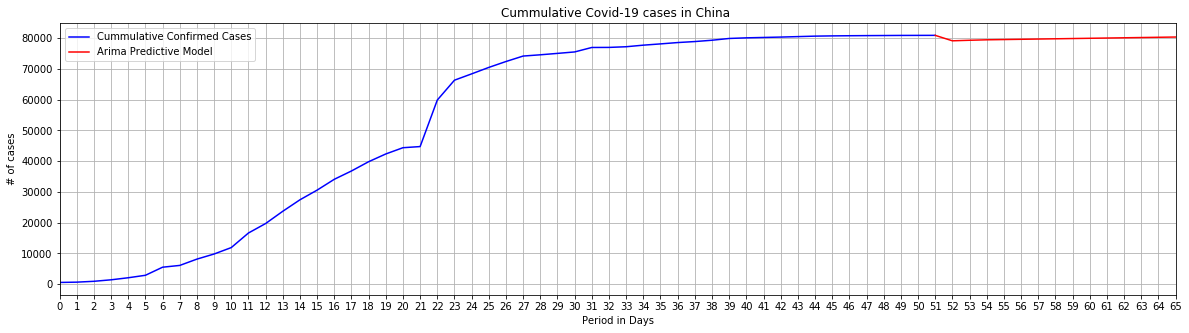

In [317]:
plt.figure(figsize=(20,5))
x_axis = np.arange(0, len(china_prelim_predict_df))
tick_locations_china = []
for x in x_axis:
    tick_locations_china.append(x)
    
plt.title("Cummulative Covid-19 cases in China ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(0,len(china_prelim_predict_df)-1)
    
confirmed_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cummulative Confirmed Cases'], color="blue", label="Cummulative Confirmed Cases")
arima_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cummulative Predictive Cases'], color ='red', label = 'Arima Predictive Model')

plt.legend(handles=[confirmed_cases_china, arima_cases_china], loc="upper left")
plt.xticks(tick_locations_china)

plt.show()

In [67]:
US_df=pd.DataFrame({
                    "#Cummulative Confirmed Cases":Confirmed_final.loc["US",:].tolist()
                   })
#US_df = US_df.set_index('Dates')
US_df.tail()

,#Cummulative Confirmed Cases
47,583
48,959
49,1281
50,1663
51,2179


In [56]:
US_df_model = US_df
#US_df_model.head()

In [109]:
US_df_model_mean = US_df_model.rolling(window = 7).mean()
US_df_model_mean.head()

,#Cummulative Confirmed Cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


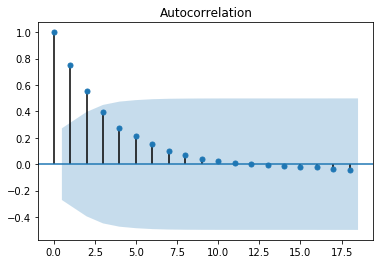

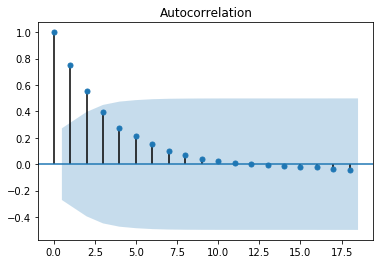

In [58]:
#ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)
#plot_acf is to identify parameter q
#plot_pacf is to identify parameter p
#ARIMA (p,d,q)

plot_acf(US_df_model)

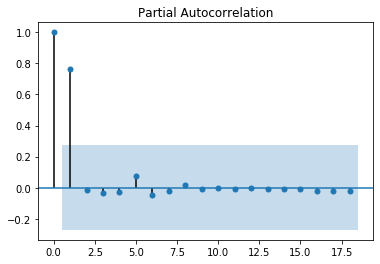

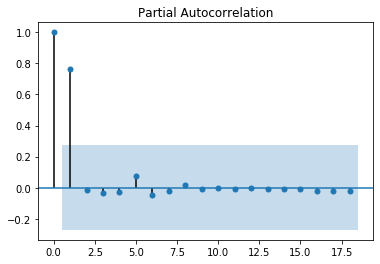

In [59]:
plot_pacf(US_df_model)

In [191]:
train_parameter_US = 5

In [193]:
# p = 0,1  d = 0,1  q = 0,1,2
#US_df_model.size >>> 52
US_df_train = china_df_model[0:train_parameter_US]
US_df_test = US_df_model[train_parameter_US:19]
forecast_step_US = US_df_test.size
forecast_step_US

14

In [194]:
US_model = ARIMA(US_df_train, order=(0,1,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [195]:
US_model_fit = US_model.fit()
US_model_fit.aic

58.97668273665367

In [196]:
US_forecast = US_model_fit.forecast(steps = forecast_step_US)[0]
US_forecast

array([2685.16683406, 3067.00200761, 3448.83718115, 3830.67235469,
       4212.50752824, 4594.34270178, 4976.17787533, 5358.01304887,
       5739.84822242, 6121.68339596, 6503.51856951, 6885.35374305,
       7267.1889166 , 7649.02409014])

In [197]:
np.sqrt(mean_squared_error(US_df_test,US_forecast))

5382.580945040883

In [198]:
US_df_test.head()

,#Cummulative Confirmed Cases
5,5
6,5
7,5
8,5
9,7


In [199]:
US_predict_df= pd.DataFrame({"#Cummulative Predictive Cases":US_forecast.tolist()})
US_predict_df.head()

,#Cummulative Predictive Cases
0,2685.166834
1,3067.002008
2,3448.837181
3,3830.672355
4,4212.507528


In [320]:
US_prelim_predict_df = pd.concat([US_df, US_predict_df],sort=False, ignore_index=True)
US_prelim_predict_df.loc[[51],'#Cummulative Predictive Cases'] = 2179.0
US_prelim_predict_df.head()

,#Cummulative Confirmed Cases,#Cummulative Predictive Cases
0,1.0,NaN
1,1.0,NaN
2,2.0,NaN
3,2.0,NaN
4,5.0,NaN


In [201]:
#US_df_model_mean.iloc[0:52,:]
len(US_prelim_predict_df)

66

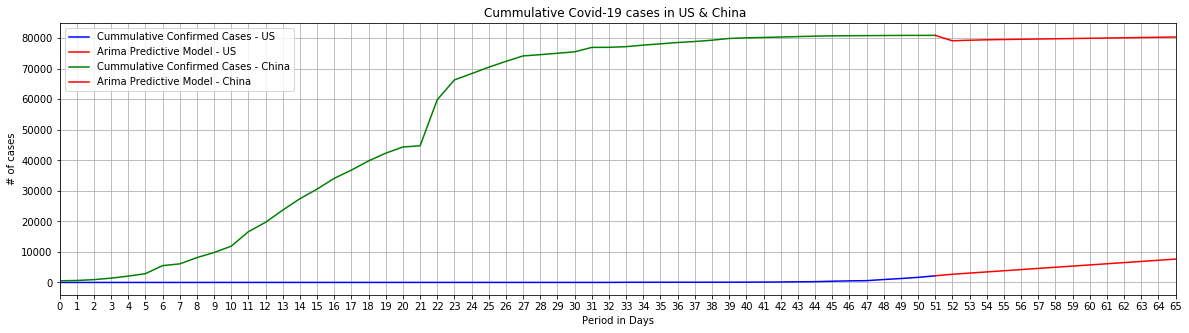

In [343]:
plt.figure(figsize=(20,5))
x_axis = np.arange(0, len(US_prelim_predict_df))
tick_locations_US = []
for x in x_axis:
    tick_locations_US.append(x)
    
plt.title("Cummulative Covid-19 cases in US & China ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(0,len(US_prelim_predict_df)-1)
    
confirmed_cases_US, = plt.plot(x_axis, US_prelim_predict_df.loc[:,'#Cummulative Confirmed Cases'], color="blue", label="Cummulative Confirmed Cases - US")
arima_cases_US, = plt.plot(x_axis, US_prelim_predict_df.loc[:,'#Cummulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - US')
confirmed_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cummulative Confirmed Cases'], color="green", label="Cummulative Confirmed Cases - China")
arima_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cummulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - China')

plt.legend(handles=[confirmed_cases_US, arima_cases_US,confirmed_cases_china,arima_cases_china], loc="upper left")
plt.xticks(tick_locations_US)

plt.show()

In [321]:
canada_df=pd.DataFrame({
                    "#Cummulative Confirmed Cases":Confirmed_final.loc["Canada",:].tolist()
                   })
#canada_df = US_df.set_index('Dates')
canada_df.tail()

,#Cummulative Confirmed Cases
47,77
48,79
49,108
50,117
51,193


In [322]:
canada_df_model = canada_df
#canada_df_model.head()

In [324]:
canada_df_model_mean = canada_df_model.rolling(window = 7).mean()
canada_df_model_mean.head()

,#Cummulative Confirmed Cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


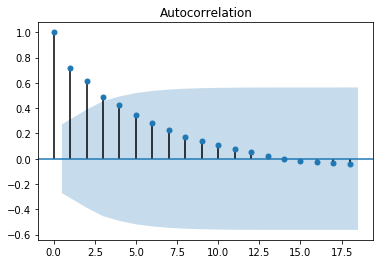

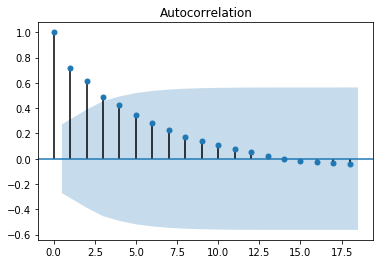

In [325]:
#ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)
#plot_acf is to identify parameter q
#plot_pacf is to identify parameter p
#ARIMA (p,d,q)

plot_acf(canada_df_model)

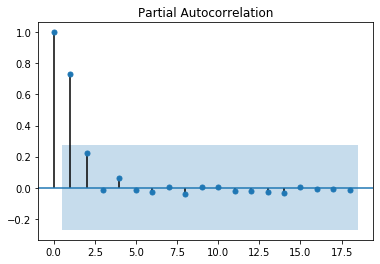

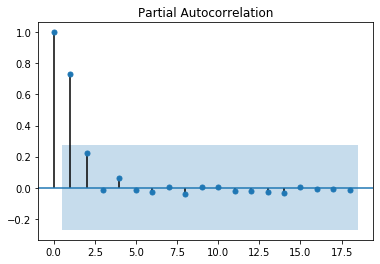

In [327]:
#ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)
#plot_acf is to identify parameter q
#plot_pacf is to identify parameter p
#ARIMA (p,d,q)

plot_pacf(canada_df_model)

In [403]:
#US_df

In [431]:
train_parameter_canada = 4

In [433]:
# p = 0,1,2  d = 0,1  q = 0,1,2,3
#canada_df_model.size >>> 52
canada_df_train = china_df[0:train_parameter_canada]
canada_df_test = canada_df_model[train_parameter_canada:18]
forecast_step_canada = canada_df_test.size
forecast_step_canada

14

In [449]:
canada_model = ARIMA(canada_df_train, order=(1,1,0))

In [450]:
canada_model_fit = canada_model.fit()
canada_model_fit.aic

44.955352728349965

In [451]:
canada_forecast = canada_model_fit.forecast(steps = forecast_step_US)[0]
canada_forecast

array([1691.35842464, 1977.35242989, 2263.34442177, 2549.33642004,
       2835.32841828, 3121.32041653, 3407.31241477, 3693.30441302,
       3979.29641126, 4265.28840951, 4551.28040775, 4837.272406  ,
       5123.26440424, 5409.25640249])

In [452]:
np.sqrt(mean_squared_error(canada_df_test,canada_forecast))

3728.715205973237

In [453]:
canada_df_test.head()

,#Cummulative Confirmed Cases
4,1
5,1
6,2
7,2
8,2


In [454]:
canada_predict_df= pd.DataFrame({"#Cummulative Predictive Cases":canada_forecast.tolist()})
canada_predict_df.head()

,#Cummulative Predictive Cases
0,1691.358425
1,1977.352430
2,2263.344422
3,2549.336420
4,2835.328418


In [455]:
canada_prelim_predict_df = pd.concat([canada_df, canada_predict_df],sort=False, ignore_index=True)
canada_prelim_predict_df.loc[[51],'#Cummulative Predictive Cases'] = 193.0
canada_prelim_predict_df.head()

,#Cummulative Confirmed Cases,#Cummulative Predictive Cases
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,1.0,NaN


In [456]:
#canada_df_model_mean.iloc[0:52,:]
len(canada_prelim_predict_df)

66

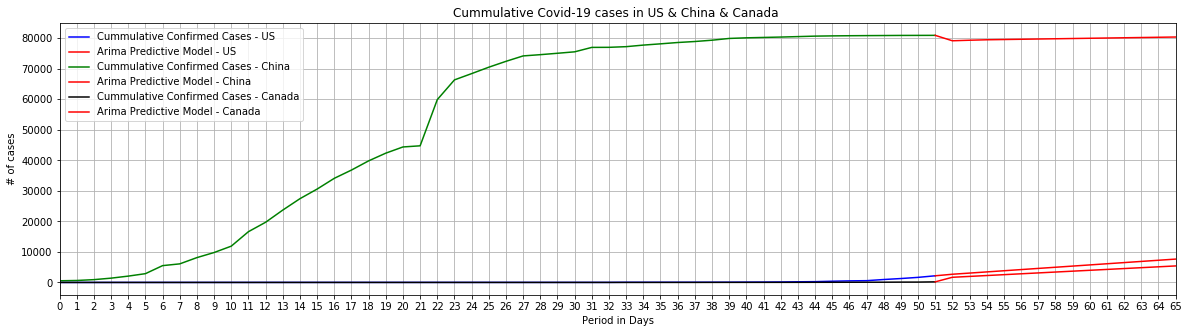

In [457]:
plt.figure(figsize=(20,5))
x_axis = np.arange(0, len(US_prelim_predict_df))
tick_locations_US = []
for x in x_axis:
    tick_locations_US.append(x)
    
plt.title("Cummulative Covid-19 cases in US & China & Canada ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(0,len(US_prelim_predict_df)-1)
    
confirmed_cases_US, = plt.plot(x_axis, US_prelim_predict_df.loc[:,'#Cummulative Confirmed Cases'], color="blue", label="Cummulative Confirmed Cases - US")
arima_cases_US, = plt.plot(x_axis, US_prelim_predict_df.loc[:,'#Cummulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - US')

confirmed_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cummulative Confirmed Cases'], color="green", label="Cummulative Confirmed Cases - China")
arima_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cummulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - China')

confirmed_cases_canada, = plt.plot(x_axis, canada_prelim_predict_df.loc[:,'#Cummulative Confirmed Cases'], color="black", label="Cummulative Confirmed Cases - Canada")
arima_cases_canada, = plt.plot(x_axis, canada_prelim_predict_df.loc[:,'#Cummulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - Canada')

plt.legend(handles=[confirmed_cases_US, arima_cases_US,confirmed_cases_china,arima_cases_china,confirmed_cases_canada,arima_cases_canada], loc="upper left")
plt.xticks(tick_locations_US)

plt.show()